In [1]:
import pandas as pd
# Step 1: Load your data
file_path = 'data_daily.csv'
data = pd.read_csv(file_path)

In [3]:
# Step 2: Preprocess the data
data['# Date'] = pd.to_datetime(data['# Date'])
data.set_index('# Date', inplace=True)
data = data.asfreq('D')

In [4]:
# Split the data into training and testing sets
train = data['Receipt_Count'][:-30]  # Last 30 days for testing
test = data['Receipt_Count'][-30:]

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Step 3: SARIMA Model Fitting
p, d, q = 2, 1, 2  # Non-seasonal parameters
P, D, Q, s = 2, 1, 2, 14  # Seasonal parameters
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
# Step 4: Make Predictions
predictions = sarima_results.get_forecast(steps=30)
predicted_means = predictions.predicted_mean

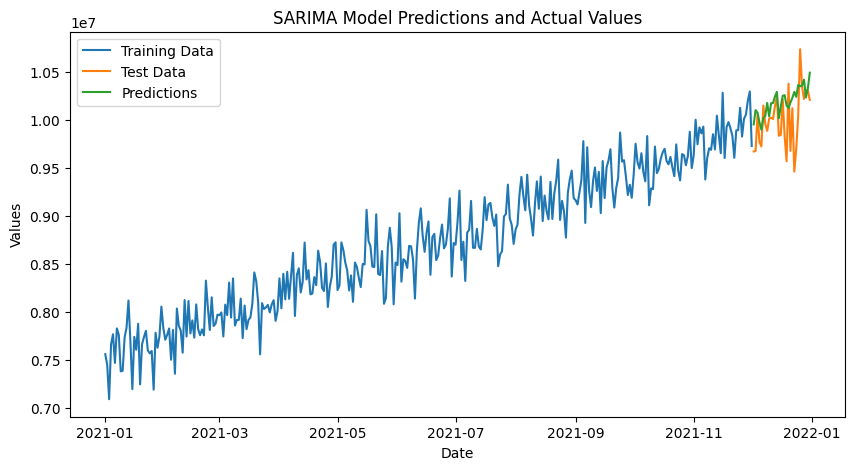

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5: Plot the predictions and actual values
plt.figure(figsize=(10, 5))
sns.lineplot(data=train, label='Training Data')
sns.lineplot(data=test, label='Test Data')
sns.lineplot(data=predicted_means, label='Predictions')
plt.title('SARIMA Model Predictions and Actual Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [9]:
import tensorflow as tf

# Step 6: Calculate Accuracy
# RMSE calculation using TensorFlow
rmse = tf.keras.metrics.RootMeanSquaredError()
rmse.update_state(tf.constant(test.values, dtype=tf.float32), tf.constant(predicted_means.values, dtype=tf.float32))
print(f'RMSE: {rmse.result().numpy()}')
print(sarima_results.summary())

RMSE: 307372.53125
                                     SARIMAX Results                                      
Dep. Variable:                      Receipt_Count   No. Observations:                  335
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 14)   Log Likelihood               -4511.436
Date:                            Tue, 28 Nov 2023   AIC                           9040.872
Time:                                    02:43:40   BIC                           9074.787
Sample:                                01-01-2021   HQIC                          9054.415
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5304      0.451     -1.177      0.239      -1.414       0.353
ar.L2          0

In [18]:
#2022 prediction

future_model = SARIMAX(data['Receipt_Count'], order=(p, d, q), seasonal_order=(P, D, Q, s))
future_results = future_model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
start_date = '2022-01-01'
end_date = '2022-12-31'
future_predictions = future_results.get_prediction(start=pd.to_datetime(start_date),
                                            end=pd.to_datetime(end_date))
future_predicted_means = future_predictions.predicted_mean
future_predicted_means

2022-01-01    1.015727e+07
2022-01-02    9.948646e+06
2022-01-03    1.034955e+07
2022-01-04    1.004326e+07
2022-01-05    1.026751e+07
                  ...     
2022-12-27    1.559695e+07
2022-12-28    1.551644e+07
2022-12-29    1.553932e+07
2022-12-30    1.565655e+07
2022-12-31    1.565570e+07
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

summary:                                      SARIMAX Results                                      
Dep. Variable:                      Receipt_Count   No. Observations:                  335
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 14)   Log Likelihood               -4511.436
Date:                            Tue, 28 Nov 2023   AIC                           9040.872
Time:                                    02:53:52   BIC                           9074.787
Sample:                                01-01-2021   HQIC                          9054.415
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5304      0.451     -1.177      0.239      -1.414       0.353
ar.L2          0.1434     

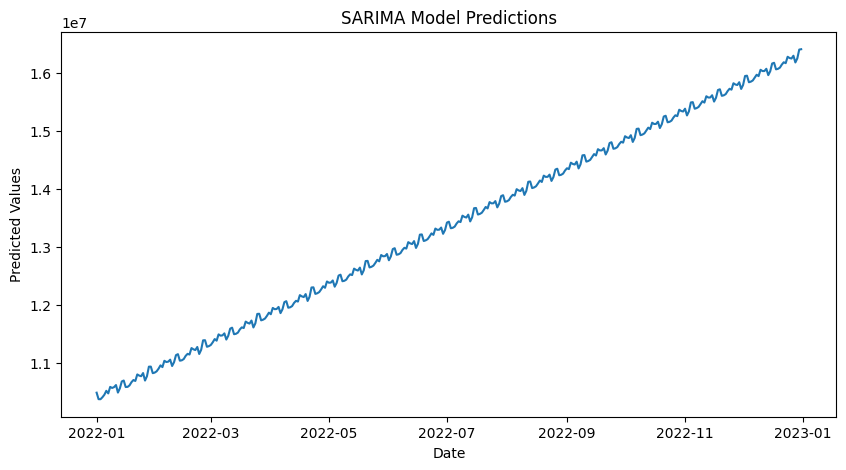

In [13]:
print("summary:",sarima_results.summary())

# Step 8: Plot the predictions
plt.figure(figsize=(10, 5))
sns.lineplot(data=future_predicted_means)
plt.title('SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Values')
plt.show()

In [25]:
import pickle

# Save model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(future_results, file)

In [26]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# Load the trained model from the pickle file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [35]:
# future predictions
start_date = '2022-11-01'
end_date = '2022-11-30'
future_predictions = future_results.get_prediction(start=pd.to_datetime(start_date),
                                            end=pd.to_datetime(end_date))
future_predicted_means = future_predictions.predicted_mean
